In [ ]:
import pandas as pd

# Replace 'elevator_data.csv' with your actual file path
data = pd.read_csv('elevator-data.txt')

# Write the data to a new Excel file
# Replace 'new_excel_file.xlsx' with your desired output file name
data.to_excel('new_excel_file.xlsx', index=False)


Mean Squared Error: 0.4129959295799969
R-squared: 0.8587004422556294


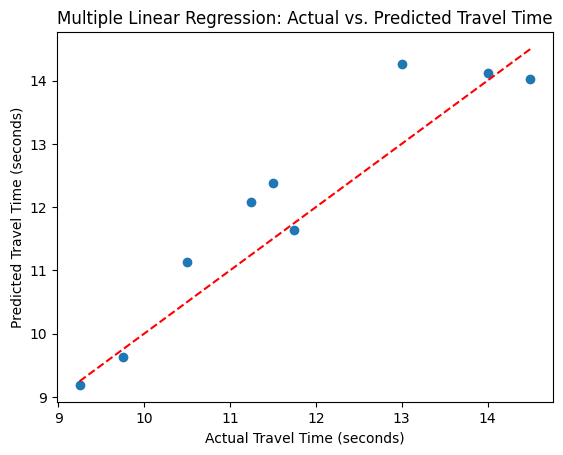

[11.61785003]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('elevator-data.txt')

# Preprocess data: Extract the maximum number from hyphen-separated data in 'StopFloors'
data['StopFloors'] = data['StopFloors'].str.split('-').apply(lambda x: max(map(int, x)) if isinstance(x, list) else x)

# Convert all columns to numeric, handling errors
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Define features (X) and target (y)
X = data[['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']]
y = data['TravelTime']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs. actual travel time
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Travel Time (seconds)")
plt.ylabel("Predicted Travel Time (seconds)")
plt.title("Multiple Linear Regression: Actual vs. Predicted Travel Time")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Add a diagonal line
plt.show()

t=model.predict([[3,7,2,9,456,378]])
print(t)

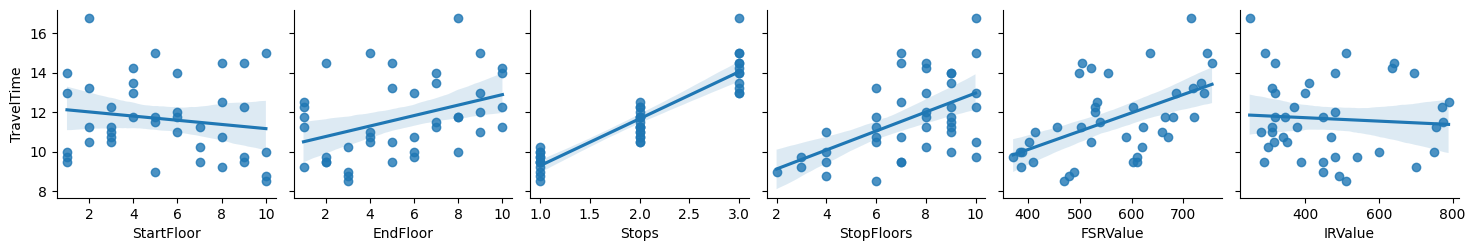

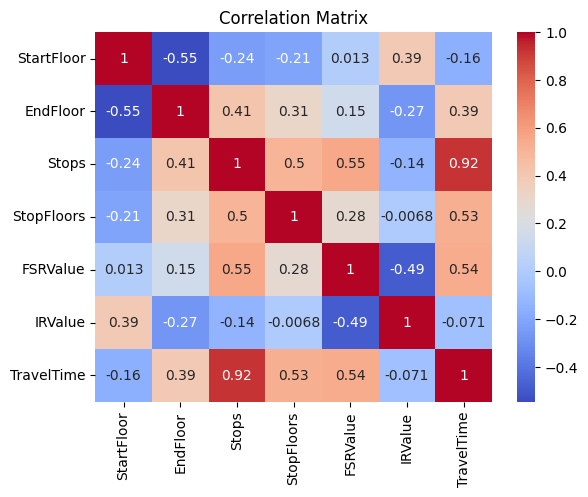

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for better visualization

# Load the dataset
data = pd.read_csv('elevator-data.txt')

# Preprocess data: Extract the maximum number from hyphen-separated data in 'StopFloors'
data['StopFloors'] = data['StopFloors'].str.split('-').apply(lambda x: max(map(int, x)) if isinstance(x, list) else x)

# Convert all columns to numeric, handling errors
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Create pair plots (scatter plots and histograms)
sns.pairplot(data, x_vars=['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue'], y_vars=['TravelTime'], kind='reg')
plt.show()

# Create a correlation matrix heatmap
correlation_matrix = data[['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue', 'TravelTime']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Model Evaluation:
Mean Squared Error: 0.4129959295799969
R-squared: 0.8587004422556294


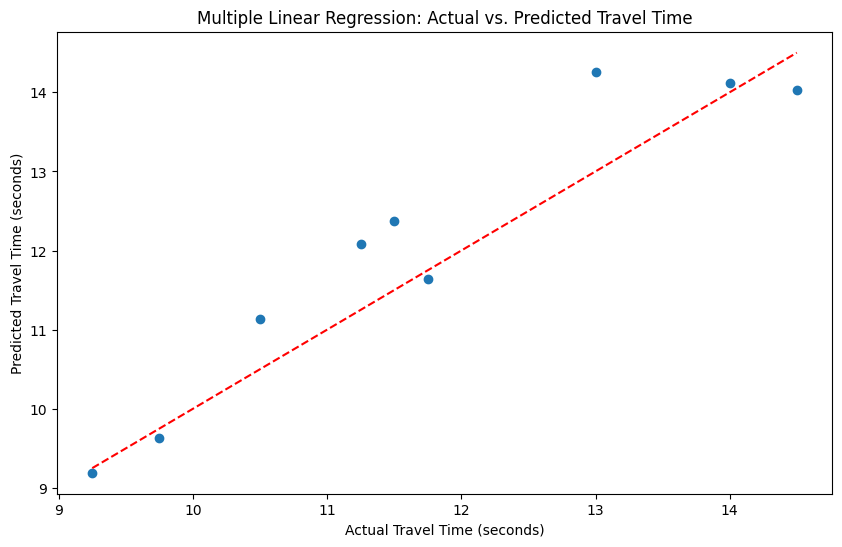


Prediction for first row in dataset:
Input values: Start Floor=3.0, End Floor=7.0, Stops=2.0, Stop Floors=9.0, FSR Value=456.0, IR Value=378.0
Actual Travel Time: 11.25
Predicted Travel Time: 11.62

Prediction for sixth row in dataset:
Input values: Start Floor=6.0, End Floor=4.0, Stops=2.0, Stop Floors=9.0, FSR Value=658.0, IR Value=310.0
Actual Travel Time: 11.0
Predicted Travel Time: 11.76


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('elevator-data.txt')

# Preprocess data: Extract the maximum number from hyphen-separated data in 'StopFloors'
data['StopFloors'] = data['StopFloors'].str.split('-').apply(lambda x: max(map(int, x)) if isinstance(x, list) else x)

# Convert all columns to numeric, handling errors
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Define features (X) and target (y)
X = data[['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']]
y = data['TravelTime']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Plot predicted vs. actual travel time
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Travel Time (seconds)")
plt.ylabel("Predicted Travel Time (seconds)")
plt.title("Multiple Linear Regression: Actual vs. Predicted Travel Time")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.show()

# Example 1: Using the first row from the dataset
sample_input1 = data.iloc[0][['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']].values.reshape(1, -1)
prediction1 = model.predict(sample_input1)
print("\nPrediction for first row in dataset:")
print(f"Input values: Start Floor={data.iloc[0]['StartFloor']}, End Floor={data.iloc[0]['EndFloor']}, "
      f"Stops={data.iloc[0]['Stops']}, Stop Floors={data.iloc[0]['StopFloors']}, "
      f"FSR Value={data.iloc[0]['FSRValue']}, IR Value={data.iloc[0]['IRValue']}")
print(f"Actual Travel Time: {data.iloc[0]['TravelTime']}")
print(f"Predicted Travel Time: {prediction1[0]:.2f}")

# Example 2: Using a different row from the dataset (let's use row 5)
sample_input2 = data.iloc[5][['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']].values.reshape(1, -1)
prediction2 = model.predict(sample_input2)
print("\nPrediction for sixth row in dataset:")
print(f"Input values: Start Floor={data.iloc[5]['StartFloor']}, End Floor={data.iloc[5]['EndFloor']}, "
      f"Stops={data.iloc[5]['Stops']}, Stop Floors={data.iloc[5]['StopFloors']}, "
      f"FSR Value={data.iloc[5]['FSRValue']}, IR Value={data.iloc[5]['IRValue']}")
print(f"Actual Travel Time: {data.iloc[5]['TravelTime']}")
print(f"Predicted Travel Time: {prediction2[0]:.2f}")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 151.0000 - mae: 12.1215 - val_loss: 119.2229 - val_mae: 10.6785
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 138.1058 - mae: 11.5929 - val_loss: 116.1170 - val_mae: 10.5262
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 140.9485 - mae: 11.6873 - val_loss: 112.9088 - val_mae: 10.3654
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 137.4223 - mae: 11.5638 - val_loss: 109.7625 - val_mae: 10.2052
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 131.0090 - mae: 11.2705 - val_loss: 106.3944 - val_mae: 10.0296
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 134.4146 - mae: 11.4307 - val_loss: 102.7829 - val_mae: 9.8414
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 131.9858 - mae: 11.2874 - val_loss: 98.4653 - val_mae: 9.6185
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 126.5082 - mae: 11.0669 - val_loss: 93.7915 - val_mae: 9.3724
Epoch 9/100
4/4 ━━━━━━━━━━━━

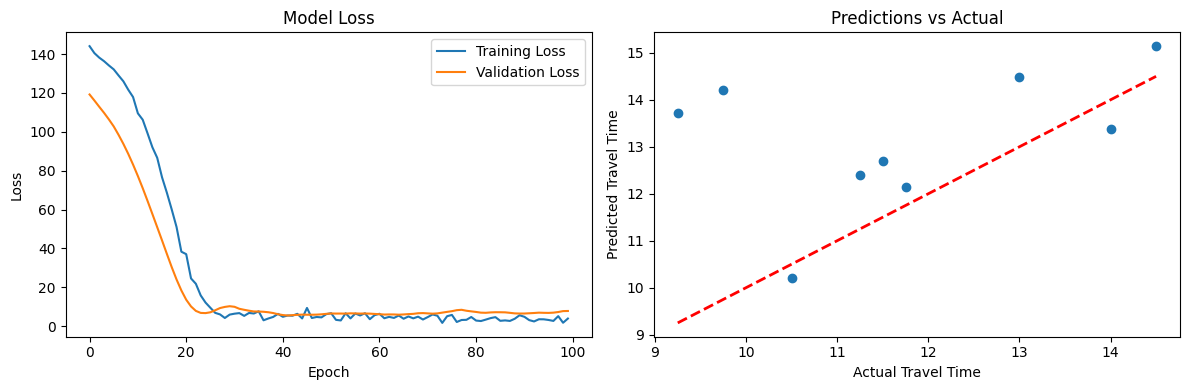

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(



Prediction for first row in dataset:
Input values: Start Floor=3.0, End Floor=7.0, Stops=2.0, Stop Floors=9.0, FSR Value=456.0, IR Value=378.0
Actual Travel Time: 11.25
Predicted Travel Time: 10.56
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step

Prediction for sixth row in dataset:
Input values: Start Floor=6.0, End Floor=4.0, Stops=2.0, Stop Floors=9.0, FSR Value=658.0, IR Value=310.0
Actual Travel Time: 11.0
Predicted Travel Time: 11.11


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load and preprocess the data
data = pd.read_csv('elevator-data.txt')

# Extract the maximum number from hyphen-separated data in 'StopFloors'
data['StopFloors'] = data['StopFloors'].str.split('-').apply(lambda x: max(map(int, x)) if isinstance(x, list) else x)

# Convert all columns to numeric
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Define features (X) and target (y)
X = data[['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']]
y = data['TravelTime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.1),
    Dense(16, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model.fit(
    X_train_scaled,
    y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    verbose=1
)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot predictions vs actual
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Travel Time')
plt.ylabel('Predicted Travel Time')
plt.title('Predictions vs Actual')
plt.tight_layout()
plt.show()

# Function to make predictions
def predict_travel_time(input_data):
    # Scale the input data
    input_scaled = scaler.transform(input_data)
    # Make prediction
    prediction = model.predict(input_scaled)
    return prediction[0][0]

# Example 1: Using first row from dataset
sample_input1 = data.iloc[0][['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']].values.reshape(1, -1)
prediction1 = predict_travel_time(sample_input1)
print("\nPrediction for first row in dataset:")
print(f"Input values: Start Floor={data.iloc[0]['StartFloor']}, End Floor={data.iloc[0]['EndFloor']}, "
      f"Stops={data.iloc[0]['Stops']}, Stop Floors={data.iloc[0]['StopFloors']}, "
      f"FSR Value={data.iloc[0]['FSRValue']}, IR Value={data.iloc[0]['IRValue']}")
print(f"Actual Travel Time: {data.iloc[0]['TravelTime']}")
print(f"Predicted Travel Time: {prediction1:.2f}")

# Example 2: Using a different row from dataset (row 5)
sample_input2 = data.iloc[5][['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']].values.reshape(1, -1)
prediction2 = predict_travel_time(sample_input2)
print("\nPrediction for sixth row in dataset:")
print(f"Input values: Start Floor={data.iloc[5]['StartFloor']}, End Floor={data.iloc[5]['EndFloor']}, "
      f"Stops={data.iloc[5]['Stops']}, Stop Floors={data.iloc[5]['StopFloors']}, "
      f"FSR Value={data.iloc[5]['FSRValue']}, IR Value={data.iloc[5]['IRValue']}")
print(f"Actual Travel Time: {data.iloc[5]['TravelTime']}")
print(f"Predicted Travel Time: {prediction2:.2f}")

Cross-validation scores: [0.87515981 0.65386634 0.67752811 0.50409573 0.72042972]
Mean CV score: 0.6862159392480625

Model Evaluation:
Mean Squared Error: 0.837791344390199
R-squared Score: 0.7133638906204598
Root Mean Squared Error: 0.9153094254896532


<Figure size 1000x600 with 0 Axes>

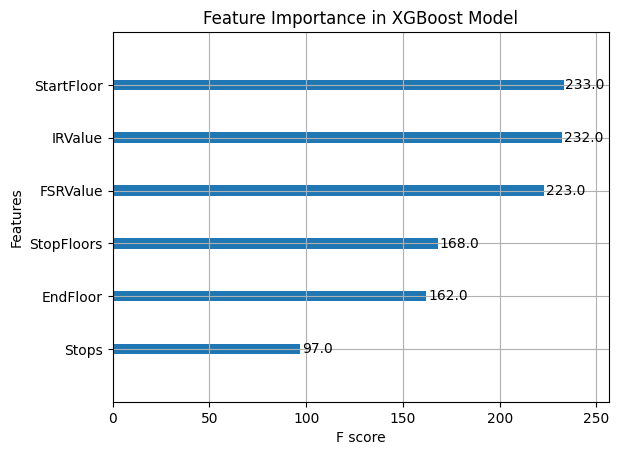

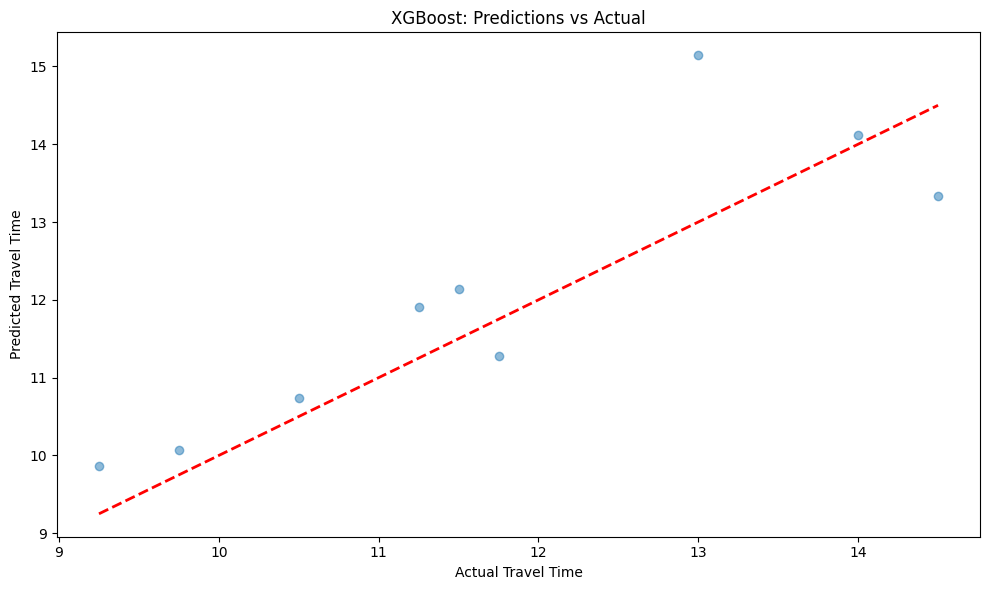


Example Predictions:

Prediction for row 0:
Input values: Start Floor=3.0, End Floor=7.0, Stops=2.0, Stop Floors=9.0, FSR Value=456.0, IR Value=378.0
Actual Travel Time: 11.25
Predicted Travel Time: 11.24

Prediction for row 5:
Input values: Start Floor=6.0, End Floor=4.0, Stops=2.0, Stop Floors=9.0, FSR Value=658.0, IR Value=310.0
Actual Travel Time: 11.0
Predicted Travel Time: 11.00

Prediction for row 10:
Input values: Start Floor=9.0, End Floor=2.0, Stops=1.0, Stop Floors=3.0, FSR Value=611.0, IR Value=480.0
Actual Travel Time: 9.75
Predicted Travel Time: 9.74

Feature Importance Ranking:
      Feature  Importance
2       Stops    0.921497
5     IRValue    0.023150
4    FSRValue    0.018936
1    EndFloor    0.015405
3  StopFloors    0.013924
0  StartFloor    0.007088


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess the data
data = pd.read_csv('elevator-data.txt')

# Extract the maximum number from hyphen-separated data in 'StopFloors'
data['StopFloors'] = data['StopFloors'].str.split('-').apply(lambda x: max(map(int, x)) if isinstance(x, list) else x)

# Convert all columns to numeric
for column in data.columns:
    data[column] = pd.to_numeric(data[column], errors='coerce')

# Define features (X) and target (y)
X = data[['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']]
y = data['TravelTime']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train XGBoost model
xgb_model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='rmse'
)

# Perform cross-validation
cv_scores = cross_val_score(xgb_model, X_train, y_train, cv=5)
print("Cross-validation scores:", cv_scores)
print("Mean CV score:", cv_scores.mean())

# Train the model
xgb_model.fit(
    X_train,
    y_train,
    verbose=False
)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")
print(f"Root Mean Squared Error: {np.sqrt(mse)}")

# Plot feature importance
plt.figure(figsize=(10, 6))
xgb.plot_importance(xgb_model)
plt.title('Feature Importance in XGBoost Model')
plt.show()

# Plot predictions vs actual
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Travel Time')
plt.ylabel('Predicted Travel Time')
plt.title('XGBoost: Predictions vs Actual')
plt.tight_layout()
plt.show()

# Function to make predictions
def predict_travel_time(input_data):
    prediction = xgb_model.predict(input_data)
    return prediction[0]

# Example predictions using different rows
print("\nExample Predictions:")
for i in [0, 5, 10]:
    sample_input = data.iloc[i][['StartFloor', 'EndFloor', 'Stops', 'StopFloors', 'FSRValue', 'IRValue']].values.reshape(1, -1)
    prediction = predict_travel_time(sample_input)
    print(f"\nPrediction for row {i}:")
    print(f"Input values: Start Floor={data.iloc[i]['StartFloor']}, End Floor={data.iloc[i]['EndFloor']}, "
          f"Stops={data.iloc[i]['Stops']}, Stop Floors={data.iloc[i]['StopFloors']}, "
          f"FSR Value={data.iloc[i]['FSRValue']}, IR Value={data.iloc[i]['IRValue']}")
    print(f"Actual Travel Time: {data.iloc[i]['TravelTime']}")
    print(f"Predicted Travel Time: {prediction:.2f}")

# Print feature importance scores
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance Ranking:")
print(importance_df)